# 7.Random forest

#### Import packages

In [1]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline


import h2o
from h2o.estimators import H2ORandomForestEstimator

#### set directories

In [2]:
print(os.getcwd())
dirRawData = "../RawData/"
dirPData = "../PData/"
dirPOutput = "../POutput/"

C:\Users\munch\Documents\Cass MSc\Term 3\Machine Learning\Coursework\PCode


#### Read csv files

In [3]:
df_train = pd.read_csv(dirRawData + 'train.csv')
df_test = pd.read_csv(dirRawData + 'test.csv')
type(df_train)

pandas.core.frame.DataFrame

#### Load the data

In [4]:
# load df_all
#df_all = pd.read_hdf(dirPData + '02_df_all.h5', 'df_all_onehot')
f_name = dirPData + '02_df.pickle'
with open(f_name, "rb") as f:
    dict_ = pickle.load(f)
    
df_all_onehot = dict_['df_all_onehot']

del f_name, dict_

# load the dict_ that was saved to pickle
#dict_ = {'vars_ind': vars_ind, 'idx_design': idx_design, 'idx_test': idx_test}
f_name = dirPData + '02_vars.pickle'
with open(f_name, "rb") as f:
    dict_ = pickle.load(f)
    
vars_ind_num = dict_['vars_ind_num']
var_dep = dict_['var_dep']
vars_ind_categorical = dict_['vars_ind_categorical']
vars_ind_onehot = dict_['vars_ind_onehot']

del f_name, dict_

After load the data, we have 

df_all_onehot #complete dataframe after onehot

vars_ind_num  #numerical variable's name

var_dep       #'target' 

vars_ind_categorical # categorical variable's name

vars_ind_onehot      # onehot categorical's name

#### Functions

In [5]:
def fn_MAE(actuals, predictions):
    return (np.mean(np.abs(predictions - actuals)))

def fn_RMSE(actuals, predictions):
    return np.round(np.sqrt(np.mean((predictions - actuals)**2)))

#### split data into training, validation and test folds

In [6]:
#split train data into 10 folds (0 to 9)
rng = np.random.RandomState(2018)
fold = rng.randint(0,10,df_train.shape[0])
df_train.loc[:,'fold']= fold

#let df_test_onehot have fold column with value 10
df_test.loc[:,'fold']= 10

#add back train and test dataframe to form a new df_all_onehot
df_all = pd.concat([df_train, df_test],ignore_index = True, sort =False)   #now df_all has folds

In [7]:
len(df_all )

17083

In [8]:
len(df_train)

11962

In [9]:
len(df_test)

5121

In [10]:
idx_train  = df_all['fold'].isin(range(9))
idx_val    = df_all['fold'].isin([9])
idx_design = df_all['fold'].isin(range(10))
idx_test   = df_all['fold'].isin([10])

y = df_all[var_dep].values.ravel()
y_train = y[idx_train]
y_val = y[idx_val]
y_design = y[idx_design]
y_test = y[idx_test]

In [11]:
vars_ind = vars_ind_categorical + vars_ind_num

In [12]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\Users\munch\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\munch\AppData\Local\Temp\tmpegggm3ty
  JVM stdout: C:\Users\munch\AppData\Local\Temp\tmpegggm3ty\h2o_munch_started_from_python.out
  JVM stderr: C:\Users\munch\AppData\Local\Temp\tmpegggm3ty\h2o_munch_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,Europe/London
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.2
H2O cluster version age:,5 months and 22 days !!!
H2O cluster name:,H2O_from_python_munch_ngysce
H2O cluster total nodes:,1
H2O cluster free memory:,3.531 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [13]:
h2o_df_all = h2o.H2OFrame(df_all[vars_ind + var_dep + ['fold']],
                         destination_frame = 'df_all')

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [14]:
h2o_df_all.head()

v_char_1,v_char_2,v_char_3,v_char_4,v_char_5,v_char_6,v_char_7,v_char_8,v_char_9,v_char_10,v_char_11,v_char_12,v_char_13,v_char_14,v_char_15,v_char_16,v_char_17,v_char_18,v_char_19,v_char_20,v_char_21,v_char_22,v_char_23,v_char_24,v_char_25,v_char_26,v_char_27,v_char_28,v_char_29,v_char_30,v_char_31,v_char_32,v_char_33,v_char_34,v_char_35,v_char_36,v_char_37,v_char_38,v_char_39,v_char_40,v_char_41,v_char_42,v_char_43,v_char_44,v_char_45,v_char_46,v_char_47,v_char_48,v_char_49,v_char_50,v_char_51,v_char_52,v_char_53,v_char_54,v_char_55,v_char_56,v_char_57,v_char_58,v_char_59,v_char_60,v_char_61,v_char_62,v_char_63,v_char_64,v_char_65,v_char_66,v_char_67,v_char_68,v_char_69,v_char_70,v_char_71,v_char_72,v_char_73,v_char_74,v_char_75,v_char_76,v_char_77,v_char_78,v_char_79,v_char_80,v_char_81,v_char_82,v_char_83,v_char_84,v_char_85,v_char_86,v_char_87,v_char_88,v_char_89,v_char_90,v_char_91,v_char_92,v_char_93,v_char_94,v_char_95,v_char_96,v_char_97,v_char_98,v_char_99,v_char_100,v_char_101,v_char_102,v_char_103,v_char_104,v_char_105,v_char_106,v_char_107,v_char_108,v_char_109,v_char_110,v_char_111,v_char_112,v_char_113,v_char_114,v_char_115,v_char_116,v_char_117,v_char_118,v_char_119,v_char_120,v_char_121,v_char_122,v_char_123,id,v_num_1,v_num_2,v_num_3,v_num_4,v_num_5,v_num_6,v_num_7,v_num_8,v_num_9,v_num_10,v_num_11,v_num_12,v_num_13,v_num_14,v_num_15,v_num_16,v_num_17,v_num_18,v_num_19,v_num_20,v_num_21,v_num_22,v_num_23,v_num_24,v_num_25,v_num_26,v_num_27,v_num_28,v_num_29,v_num_30,v_num_31,v_num_33,v_num_34,v_num_35,v_num_36,v_num_37,v_num_38,v_num_39,v_num_40,v_num_41,v_num_42,v_num_43,v_num_44,v_num_45,v_num_46,v_num_47,v_num_48,v_num_49,v_num_50,v_num_51,v_num_52,v_num_53,v_num_54,v_num_55,v_num_56,v_num_57,v_num_58,v_num_59,v_num_60,v_num_61,v_num_62,v_num_63,v_num_64,v_num_65,v_num_66,v_num_67,v_num_68,v_num_69,v_num_70,v_num_71,v_num_72,v_num_73,v_num_74,v_num_75,v_num_76,v_num_77
G,V,q,S,Q,K,Q,d,Y,V,T,n,u,h,C,K,N,o,I,Q,S,F,U,x,r,V,j,U,G,e,t,D,p,n,X,Q,U,d,Q,W,p,q,p,k,R,e,A,O,s,F,b,E,h,b,a,I,N,P,E,E,u,D,y,P,R,B,d,m,e,h,p,o,w,S,q,l,K,b,G,w,D,c,h,Y,E,f,E,L,l,d,M,f,a,R,M,u,a,E,f,q,T,F,a,t,h,Q,Z,P,C,q,e,M,h,D,p,n,s,a,z,q,j,W,n,1,0,0,8,1,14,0,7,0,1,6,1,0,0,1,3,9,1,3,0,11,2,0,3,-1,1,0,3,18,1,1,7,2,0,1,20,0,10,10,0,0,7,0,11,0,0,0,0,0,4,13,3,7,12,7,1,1,0,3,3,7,12,0,1,0,-1,1,11,12,7,1,2,0,1,5,1,1
G,I,q,S,Q,i,Q,d,I,p,B,v,u,h,C,K,N,f,I,g,S,F,U,x,r,S,j,N,G,e,t,v,p,f,X,o,U,H,Q,W,j,j,T,N,J,H,j,p,s,F,b,E,B,i,a,I,N,S,o,E,O,B,m,U,R,O,d,X,Q,F,p,T,c,n,p,l,K,s,C,l,D,c,h,q,E,f,E,L,i,H,M,Q,a,E,M,u,a,E,f,q,v,F,a,t,i,H,Z,P,s,q,q,f,h,D,F,n,s,d,z,q,j,W,n,2,0,19,5,0,1,0,1,0,1,11,-2,0,0,-2,-2,1,1,0,0,2,10,0,15,-2,1,0,-1,15,-2,1,5,1,0,4,3,6,5,19,0,0,3,10,5,0,0,0,0,8,0,-2,8,3,1,3,1,12,0,1,-2,2,2,3,-2,13,20,1,-2,1,1,1,2,0,1,18,1,0
G,I,L,S,Q,L,Q,h,I,p,T,M,u,h,C,q,N,f,I,g,w,g,U,q,r,V,H,N,G,e,t,v,p,f,X,Q,U,H,e,W,p,j,E,C,R,H,j,p,s,F,b,E,B,i,a,Y,S,P,o,E,a,i,m,U,b,C,J,X,Q,F,p,T,F,n,p,l,P,s,C,l,D,c,h,q,X,i,E,L,i,H,M,Q,M,E,M,q,a,E,Y,q,T,F,I,t,h,H,F,P,s,q,q,f,B,D,F,n,s,d,z,q,j,W,n,3,0,0,8,0,3,0,7,1,1,3,-2,0,0,-2,-2,10,1,10,0,5,3,0,3,-2,1,0,-1,12,-2,1,10,1,0,2,10,0,2,4,0,0,10,0,7,0,0,0,0,0,4,-2,1,10,6,3,1,7,0,3,-2,5,11,1,-2,9,-1,1,-2,7,3,1,2,0,1,4,1,4
G,I,q,S,Q,i,Q,h,I,p,T,M,u,h,C,K,N,f,I,g,S,g,U,q,r,V,j,N,G,e,t,v,p,f,X,Q,U,H,Q,W,p,j,p,C,R,H,A,p,s,F,b,E,B,i,a,Y,N,P,o,E,u,e,s,U,R,O,d,X,e,h,p,T,w,n,p,l,K,s,C,l,D,c,h,o,E,f,E,L,i,H,M,Q,a,E,M,u,a,E,f,q,T,F,z,t,h,H,Z,P,s,q,q,f,h,D,F,n,s,d,z,q,j,W,n,4,0,0,6,0,5,0,7,0,1,8,-2,0,0,-2,-2,3,1,7,0,8,4,0,7,-2,1,0,-1,19,-2,1,17,1,1,1,16,0,15,7,0,0,6,0,2,0,0,0,0,0,4,-2,5,6,10,3,1,10,1,3,-2,4,5,1,-2,11,-1,1,-2,11,6,1,2,0,1,1,1,4
G,V,q,S,Q,i,Q,d,Y,V,B,v,u,h,C,K,N,a,I,g,S,g,U,x,r,X,j,U,G,e,t,v,p,I,X,o,U,d,Q,W,p,q,f,N,R,e,j,O,s,F,b,E,L,b,a,Y,N,P,E,E,K,s,m,o,R,C,d,m,Q,M,p,o,w,S,q,l,K,h,G,B,D,c,h,q,E,f,E,L,l,d,M,f,a,R,M,u,a,E,f,Q,T,F,a,S,h,Q,Z,P,C,q,e,M,h,D,p,n,s,P,z,q,j,W,n,6,0,0,6,0,4,0,7,0,1,8,1,0,0,4,3,6,1,11,0,5,6,0,2,14,1,2,1,16,1,1,16,1,0,1,19,0,1,4,0,0,13,0,2,0,0,0,0,0,3,9,5,12,11,3,1,10,0,5,0,5,8,1,1,11,-1,1,5,12,1,1,2,0,

In [15]:
idx_h2o_train  = h2o.H2OFrame(idx_train.astype('int').values)
idx_h2o_val    = h2o.H2OFrame(idx_val.astype('int').values)
idx_h2o_design = h2o.H2OFrame(idx_design.astype('int').values)
idx_h2o_test   = h2o.H2OFrame(idx_test.astype('int').values)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
param = {
      "ntrees" : 200
    , "max_depth" : 20
    #Row sample rate per tree (from 0.0 to 1.0). (default: ``0.6320000291``)
    , "sample_rate" : 0.7
    #col_sample_rate_per_tree: column sampling rate for each tree (without replacement)
    , "col_sample_rate_per_tree" : 0.9
    #mtries is applied AFTER col_sample_rate_per_tree
    , "mtries" : -1
    , "min_rows" : 10
    # beware of default min split improvement if using imbalanced classes
    #, min_split_improvement
    , "seed": 2019
    , "score_each_iteration": True
    , "score_tree_interval": 1
    , "stopping_metric": 'mae'
    , "stopping_rounds": 20
}

In [17]:
# note: In Python, ** unpacks keyword arguments (I think)
model = H2ORandomForestEstimator(**param)

In [18]:
model.train(x=vars_ind, 
            y='target',
            training_frame=h2o_df_all[idx_h2o_train, :],
            validation_frame=h2o_df_all[idx_h2o_val, :]
            )

drf Model Build progress: |███████████████████████████████████████████████| 100%


Actually, we should run a classification in h2o. But in h2o, the default for classification is one-third of the columns and he default for regression is the square root of the number of columns. So this model defaul itself it is a regression. Therefore, we use mae.


In [19]:
h2o.no_progress()

pred_train = model.predict(h2o_df_all[idx_h2o_train, :])
pred_val   = model.predict(h2o_df_all[idx_h2o_val, :])
pred_test  = model.predict(h2o_df_all[idx_h2o_test, :])

pred_train = pred_train.as_data_frame().values.ravel()
pred_val   = pred_val.as_data_frame().values.ravel()
pred_test  = pred_test.as_data_frame().values.ravel()

print('train error', fn_MAE(y[idx_train], pred_train))
print('val error',   fn_MAE(y[idx_val],   pred_val))


h2o.show_progress()


train error 0.09949971148921713
val error 0.12531427586568014


In [20]:
pred_design = model.predict(h2o_df_all[idx_h2o_design, :])
pred_design  = pred_design.as_data_frame().values.ravel()

drf prediction progress: |████████████████████████████████████████████████| 100%


With random forests - always check the train-val curves to ensure we have enough trees to benefit from the most possible reduction in variance.

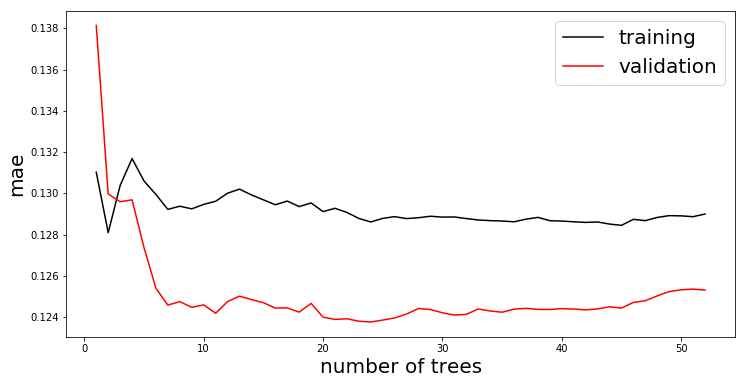

In [22]:
df_scoring_history = model.scoring_history()

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(df_scoring_history['number_of_trees'],
         df_scoring_history['training_mae'], 'k-',
         label='training')
ax1.plot(df_scoring_history['number_of_trees'],
         df_scoring_history['validation_mae'], 'r-',
        label='validation')
ax1.set_xlabel('number of trees', fontsize=20)
ax1.set_ylabel('mae', fontsize=20)
ax1.legend(fontsize=20)

#### save model

In [23]:
rf_pred_test_prob=pred_test

In [44]:
#save data
dict_ = {'rf_prob_design': pred_design,
        'rf_prob_test' :pred_test}

f_name = dirPData + 'rf.pickle'
with open(f_name, "wb") as f:
    pickle.dump(dict_, f)
del f_name

## Interpretability 

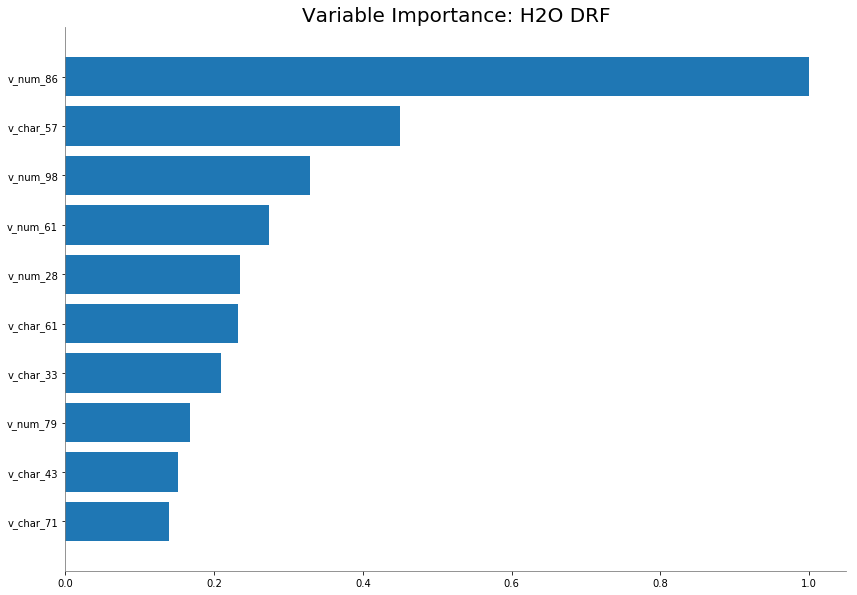

In [25]:
model.varimp_plot()
# show the top 10 most important variables

#### PDP

PartialDependencePlot progress: |█████████████████████████████████████████| 100%
PartialDependence: Partial Dependence Plot of model DRF_model_python_1562864900133_1 on column 'v_num_86'



v_num_86,mean_response,stddev_response,std_error_mean_response
0.0,0.0671781,0.1090729,0.0010482
1.0,0.0671781,0.1090729,0.0010482
2.0,0.0690021,0.1105612,0.0010625
3.0,0.0697248,0.1118348,0.0010747
4.0,0.0706884,0.1119129,0.0010755
5.0,0.0711343,0.1122792,0.0010790
6.0,0.0708648,0.1123963,0.0010801
7.0,0.0713317,0.1130409,0.0010863
8.0,0.0716979,0.1129942,0.0010859
9.0,0.0727964,0.1140542,0.0010961


[]

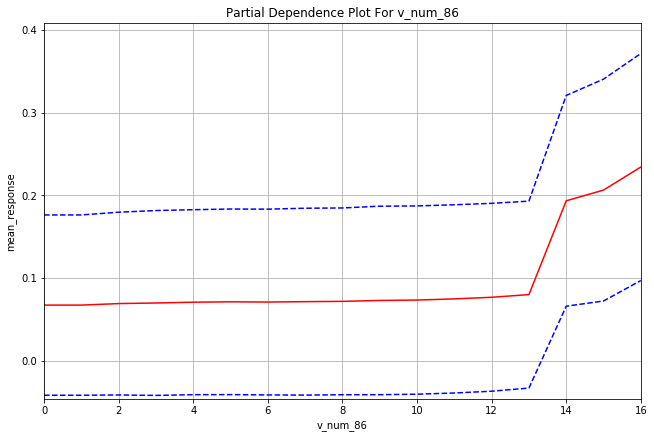

In [26]:
model.partial_plot(data = h2o_df_all[idx_h2o_train, :],
                     cols = ['v_num_86'],
                     nbins=20,
                     plot=True, 
                     plot_stddev = True,
                     figsize=(9, 6), 
                     )

### Random grid search

In [27]:
# create dataframe with combinations needed
# below for id link
sample_rate = [0.6, 0.7]
col_sample_rate_per_tree = [ 0.4, 0.6, 0.8, 0.9 ]
min_rows = [10, 20, 40]

n_iter = len(sample_rate) * len(col_sample_rate_per_tree) * len(min_rows)

params = np.array(np.meshgrid(sample_rate, col_sample_rate_per_tree, min_rows)).reshape(3, n_iter).T

df_results = pd.DataFrame(params, columns = ['sample_rate', 'col_sample_rate_per_tree', 'min_rows'])
df_results['train_mae'] = np.nan
df_results['val_mae'] = np.nan
df_results['train_rmse'] = np.nan
df_results['val_rmse'] = np.nan


In [28]:
df_results.head()

,sample_rate,col_sample_rate_per_tree,min_rows,train_mae,val_mae,train_rmse,val_rmse
0,0.6,0.4,10.0,NaN,NaN,NaN,NaN
1,0.6,0.4,20.0,NaN,NaN,NaN,NaN
2,0.6,0.4,40.0,NaN,NaN,NaN,NaN
3,0.7,0.4,10.0,NaN,NaN,NaN,NaN
4,0.7,0.4,20.0,NaN,NaN,NaN,NaN


In [29]:
df_results = df_results.sample(frac=1).reset_index(drop=True)

In [30]:

# h2o's random grid search would be better since it will parallelise over available cores
# we code it here explicitly just for "clarity"

n_models = 24 # 10

for idx in range(n_models):
    
    print(idx, 'of', n_models)
        
    sample_rate = df_results.iloc[idx]['sample_rate']
    col_sample_rate_per_tree = df_results.iloc[idx]['col_sample_rate_per_tree']
    min_rows = df_results.iloc[idx]['min_rows']
    
    param = {
      "ntrees" : 200
    , "max_depth" : 20
    # Row sample rate per tree: (default: ``0.6320000291``)
    , "mtries" : -1 # so as not to limit column sample rates
    , "sample_rate" : sample_rate
    , "col_sample_rate_per_tree" : col_sample_rate_per_tree
    , "min_rows" : min_rows
    # beware of default min split improvement if using imbalanced classes
    #, min_split_improvement
    , "seed": 2019
    , "score_each_iteration": True
    , "score_tree_interval": 1
    , "stopping_metric": 'mae'
    , "stopping_rounds": 20}
    
    model = H2ORandomForestEstimator(**param) 
    
    model.train(x=vars_ind, 
            y='target',
            training_frame=h2o_df_all[idx_h2o_train, :],
            validation_frame=h2o_df_all[idx_h2o_val, :]
            )

    model_pred_train = model.predict(h2o_df_all[idx_h2o_train, :])
    model_pred_val   = model.predict(h2o_df_all[idx_h2o_val, :])
    
    model_pred_train = model_pred_train.as_data_frame().values.ravel()
    model_pred_val   = model_pred_val.as_data_frame().values.ravel()

    df_results['train_mae'].iloc[idx] = fn_MAE(y[idx_train], model_pred_train)
    df_results['val_mae'].iloc[idx]   = fn_MAE(y[idx_val], model_pred_val)
    df_results['train_rmse'].iloc[idx] = fn_RMSE(y[idx_train], model_pred_train)
    df_results['val_rmse'].iloc[idx]   = fn_RMSE(y[idx_val], model_pred_val)


0 of 24
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
1 of 24
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
2 of 24
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
3 of 24
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 1

In [31]:
best_perf = df_results['val_mae'].min()
best_perf

0.12528279137582257

In [32]:
df_results['worse_than_best'] =  df_results['val_mae'].cummin() / best_perf
df_results['percent_of_grid'] = df_results.index / df_results.shape[0]

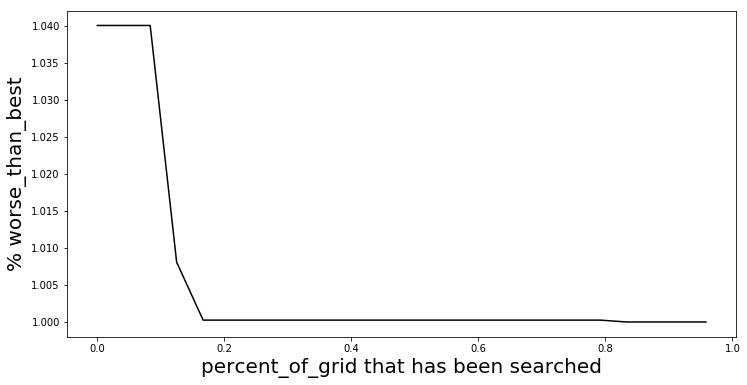

In [33]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(df_results['percent_of_grid'],
         df_results['worse_than_best'], 'k-'
         )
_ = ax1.set_xlabel('percent_of_grid that has been searched', fontsize=20)
_ = ax1.set_ylabel('% worse_than_best', fontsize=20)
#_ = ax1.legend(fontsize=20)

In [34]:
idxmin = df_results['val_mae'].idxmin()

In [35]:
df_results['val_mae']

0     0.130296
1     0.133208
2     0.134164
3     0.126293
4     0.125314
5     0.132975
6     0.130739
7     0.134031
8     0.137219
9     0.131002
10    0.136073
11    0.136170
12    0.125848
13    0.126676
14    0.128361
15    0.135214
16    0.134621
17    0.130332
18    0.129225
19    0.140108
20    0.125283
21    0.130081
22    0.139396
23    0.136350
Name: val_mae, dtype: float64

In [36]:
idxmin

20

In [37]:
print(df_results.loc[idxmin])

sample_rate                  0.600000
col_sample_rate_per_tree     0.900000
min_rows                    10.000000
train_mae                    0.103938
val_mae                      0.125283
train_rmse                   0.000000
val_rmse                     0.000000
worse_than_best              1.000000
percent_of_grid              0.833333
Name: 20, dtype: float64


In [38]:
param = {
      "ntrees" : 200
    , "max_depth" : 20
    #Row sample rate per tree (from 0.0 to 1.0). (default: ``0.6320000291``)
    , "sample_rate" : 0.6
    #col_sample_rate_per_tree: column sampling rate for each tree (without replacement)
    , "col_sample_rate_per_tree" : 0.9
    #mtries is applied AFTER col_sample_rate_per_tree
    , "mtries" : -1
    , "min_rows" : 10
    # beware of default min split improvement if using imbalanced classes
    #, min_split_improvement
    , "seed": 2019
    , "score_each_iteration": True
    , "score_tree_interval": 1
    , "stopping_metric": 'mae'
    , "stopping_rounds": 20
}

In [39]:
model = H2ORandomForestEstimator(**param)

In [40]:
model.train(x=vars_ind, 
            y='target',
            training_frame=h2o_df_all[idx_h2o_train, :],
            validation_frame=h2o_df_all[idx_h2o_val, :]
            )

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [41]:
h2o.no_progress()

pred_train = model.predict(h2o_df_all[idx_h2o_train, :])
pred_val   = model.predict(h2o_df_all[idx_h2o_val, :])
pred_test  = model.predict(h2o_df_all[idx_h2o_test, :])

pred_train = pred_train.as_data_frame().values.ravel()
pred_val   = pred_val.as_data_frame().values.ravel()
pred_test  = pred_test.as_data_frame().values.ravel()

print('train error', fn_MAE(y[idx_train], pred_train))
print('val error',   fn_MAE(y[idx_val],   pred_val))


h2o.show_progress()


train error 0.10393794079759276
val error 0.12528279137582257
